Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [79]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [80]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

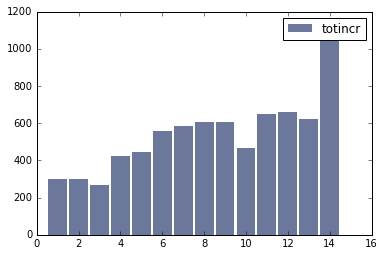

In [81]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

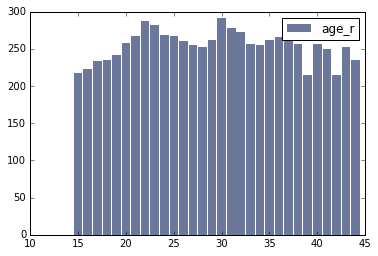

In [82]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

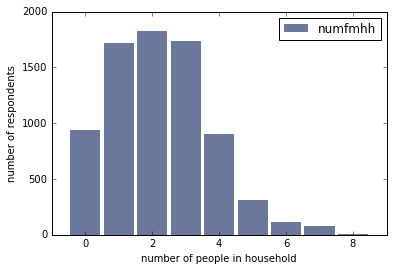

In [83]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show(xlabel='number of people in household', ylabel='number of respondents')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

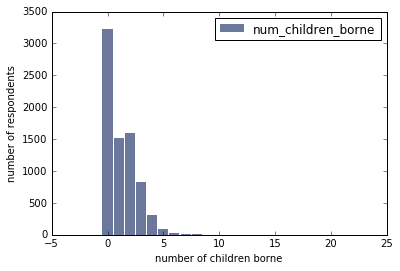

In [84]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='num_children_borne')
thinkplot.Show(xlabel='number of children borne', ylabel='number of respondents')

# This distribution tails, or drops off quickly, almost exponentially. Interestingly, 
# there are more respondents that have borne three children than two, creating a 
# slight variation in the otherwise common data trend of exponentially decreasing.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [85]:
hist = thinkstats2.Hist(resp.parity)
print hist.Largest(5)

# The most number of children borne was 22 by one respondent, showing top five

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8)]


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

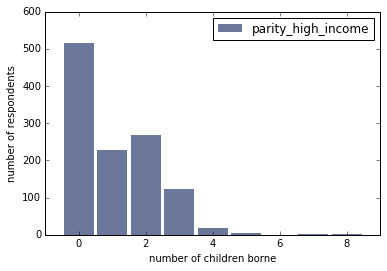

In [86]:
highest = resp[resp.totincr == 14] # 14 was the highest largest value for income brackets
hist = thinkstats2.Hist(highest.parity)
thinkplot.Hist(hist, label='parity_high_income')
thinkplot.Show(xlabel='number of children borne', ylabel='number of respondents')



Find the largest parities for high income respondents.

In [87]:
highest = resp[resp.totincr == 14] # 14 was the highest largest value for income brackets
hist = thinkstats2.Hist(highest.parity)
print hist.Largest(5)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123)]


Compare the mean <tt>parity</tt> for high income respondents and others.

In [88]:
highest =resp[resp.totincr == 14]
others = resp[resp.totincr < 14]

print "Others minus highest income average parity:", others.parity.mean() - highest.parity.mean()

Others minus highest income average parity: 0.173713744701


Investigate any other variables that look interesting.

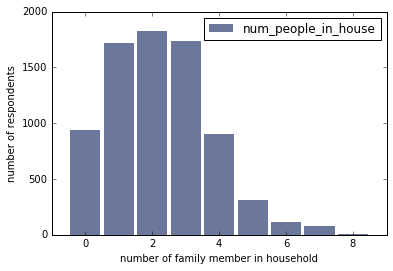

average number of family members in house:  2.2325003271


In [89]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='num_people_in_house')
thinkplot.Show(xlabel="number of family member in household", ylabel="number of respondents")
print "average number of family members in house: ", resp.numfmhh.mean()

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

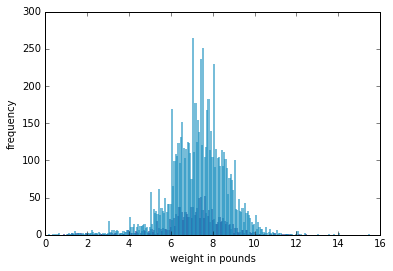

-0.00754781212903


In [90]:
import nsfg
import math
df = nsfg.ReadFemPreg()

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d




firsts = df[df.parity == 1]
others = df[df.parity != 1]

firsts_hist = thinkstats2.Hist(firsts.totalwgt_lb)
others_hist = thinkstats2.Hist(others.totalwgt_lb)

width = 0.1
thinkplot.PrePlot(2)
thinkplot.Hist(firsts_hist, align='right', width=width)
thinkplot.Hist(others_hist, align='left', width=width)
thinkplot.Show(xlabel='weight in pounds', ylabel='frequency')

print CohenEffectSize(firsts.mean(), others.mean())

#the difference in pregnancy length was 0.029, and this one is 0.0075, so the corrolation is even less!